In [1]:
import math
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
## SPECIFY CURRENT INPUT DATA HERE

trial_name = 'namo_objs1_1/pointer_pilot_server_nonoiseobs_debugpasttaskonly_onlytarg_highprec_0'

task_logs = []  ## TODO implement task logging
motion_logs = ['/Users/phillipchristoffersen/PycharmProjects/openTAMP/opentamp/experiment_logs/'+trial_name+'/MotionInfo_MotionServer0_log.txt']
policy_logs = ['/Users/phillipchristoffersen/PycharmProjects/openTAMP/opentamp/experiment_logs/'+trial_name+'/policy_control_log.txt', 
               '/Users/phillipchristoffersen/PycharmProjects/openTAMP/opentamp/experiment_logs/'+trial_name+'/policy_primitive_log.txt',
               '/Users/phillipchristoffersen/PycharmProjects/openTAMP/opentamp/experiment_logs/'+trial_name+'/policy_cont_log.txt']
rollout_test_logs = ['/Users/phillipchristoffersen/PycharmProjects/openTAMP/opentamp/experiment_logs/'+trial_name+'/test_hl_test_log.npy']

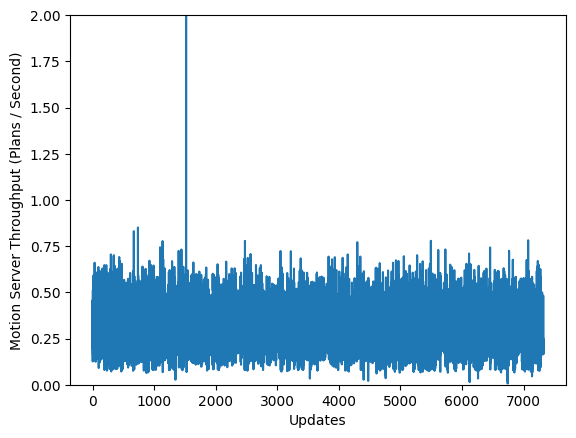

In [3]:
for motion_log in motion_logs:
    with open(motion_log) as f:
        data = f.read()

    data = data.replace("nan", "-1")
    data = data.replace("}", "},")
    data = 'var = [' + data + ']'


#     print(data)
    exec(data)
    # print(var)

#     n_plans = [a['n_plans'] if a['n_plans']>0 else 0 for a in var]
    prev_idx = 0
    curr_n_plans = 0
    
    ts = []
    avg_times = []
    
    for curr_idx in range(1, len(var)):
        if var[curr_idx]['n_plans'] > curr_n_plans:
            ts.append(var[curr_idx]['time'])
            avg_times.append((var[curr_idx]['n_plans'] - var[prev_idx]['n_plans'])/(var[curr_idx]['time'] - var[prev_idx]['time']))
            prev_idx = curr_idx
            curr_n_plans = var[curr_idx]['n_plans']
    
    plt.ylim(0,2)    
    plt.plot(range(len(avg_times)), avg_times)
    plt.xlabel('Updates')
    plt.ylabel('Motion Server Throughput (Plans / Second)')
    plt.show()

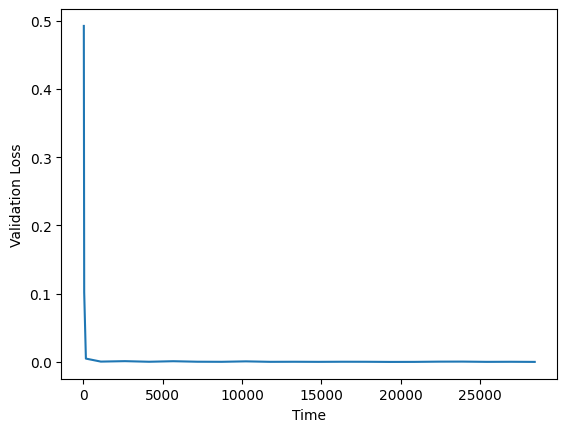

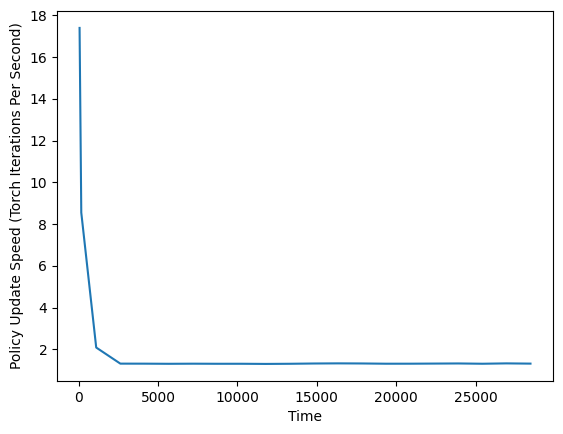

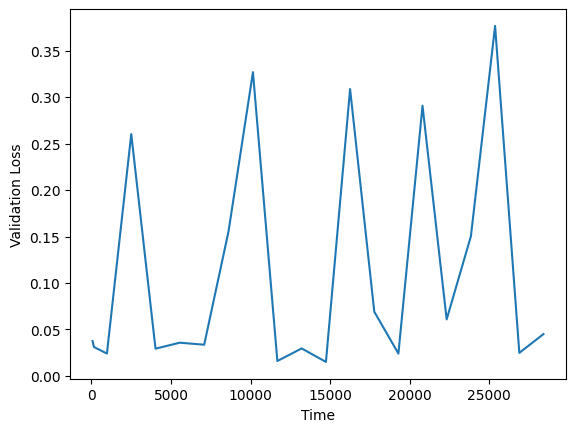

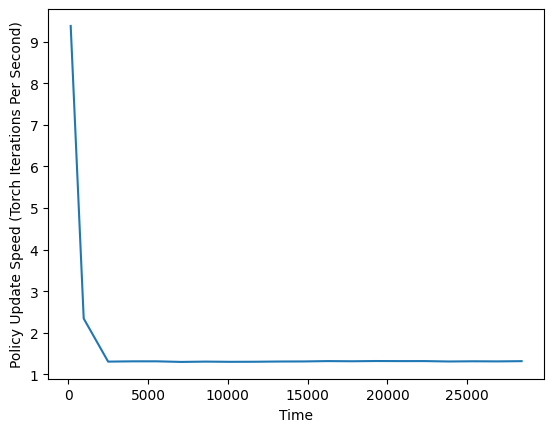

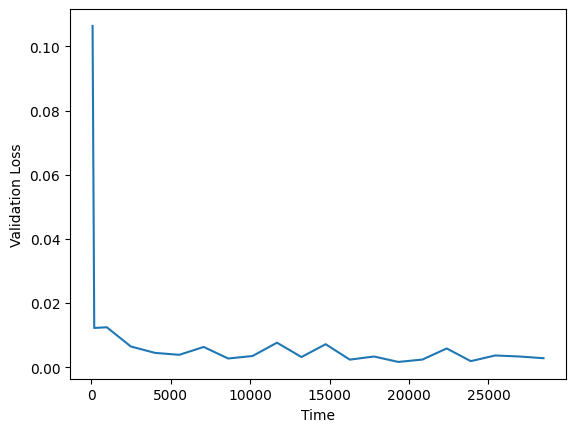

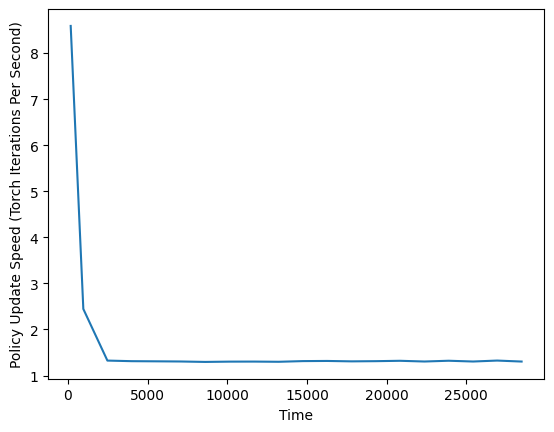

In [12]:
for policy_log in policy_logs:
    with open(policy_log) as f:
        data = f.read()

    data = data.replace("nan", "-1")
    data = data.replace("}", "},")
    data = 'var = [' + data + ']'


#     print(data)
    exec(data)
    # print(var)

    ts = [a['time'] for a in var]
    vals = [a['val_loss'] for a in var]
    plt.plot(ts, vals)
    plt.xlabel('Time')
    plt.ylabel('Validation Loss')
#     plt.ylim((0, 0.001))
    plt.show()
    
    prev_idx = 0
    curr_torch_iters = 0
    
    ts = []
    avg_times = []
    
    for curr_idx in range(1, len(var)):
        if var[curr_idx]['torch_iter'] > curr_torch_iters:
            ts.append(var[curr_idx]['time'])
            avg_times.append((var[curr_idx]['torch_iter'] - var[prev_idx]['torch_iter'])/(var[curr_idx]['time'] - var[prev_idx]['time']))
            curr_torch_iters = var[curr_idx]['torch_iter'] 
            prev_idx = curr_idx
    
    plt.plot(ts, avg_times)
    plt.xlabel('Time')
    plt.ylabel('Policy Update Speed (Torch Iterations Per Second)')
    plt.show()


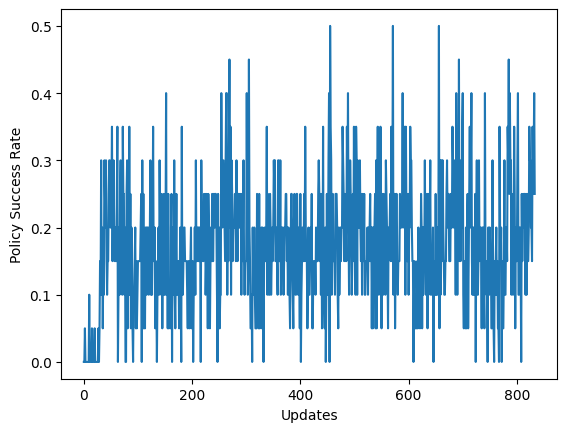

In [5]:
for rollout_test_log_link in rollout_test_logs:
    rollout_test_log = np.load(rollout_test_log_link)
    plt.plot(range(rollout_test_log.shape[0]), rollout_test_log[:, 0,0 ])
    plt.xlabel('Updates')
    plt.ylabel('Policy Success Rate')
    plt.show()